In [1]:
import os
import numpy as np
import json
model_names=os.listdir("output/")
attacks=["DeepInception","DAN","SAP200"]
final=[]
for model_name in model_names:
  res=[]
  for attack in attacks:
    if os.path.exists(f"output/{model_name}/{attack}_llamaguard.json"):      
      judgements=json.load(open(f"output/{model_name}/{attack}_llamaguard.json"))
      TP=len([x for x in judgements if "unsafe" in x["answer"]])
      AS=TP/(len(judgements))
      AS=AS*100
      res.append(AS)

  if len(res)>0:
    avg=float(np.mean(res))
    res.append(avg)  
    final.append(res)
   


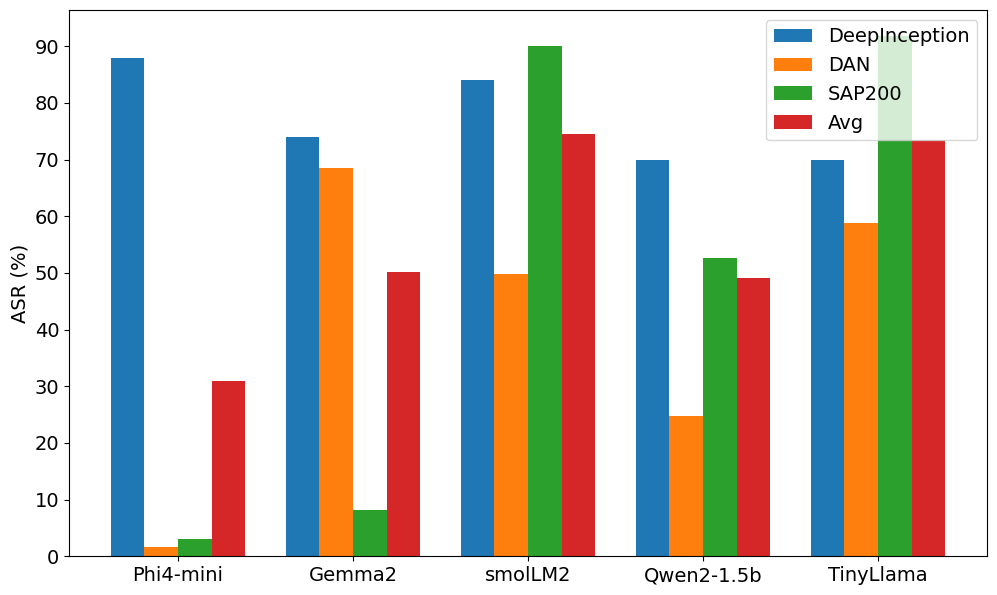

In [36]:
import matplotlib.pyplot as plt
import numpy as np


model_names = ["Phi4-mini","Gemma2","smolLM2","Qwen2-1.5b","TinyLlama"]
attack_types = attacks + ["Avg"]


scores = np.array(final).T  #

# Parametri per il plot
n_models = len(model_names)
n_attacks = len(attack_types)
bar_width = 0.25
group_spacing = 0.3  #

x = np.array([i * (n_attacks * bar_width + group_spacing) for i in range(n_models)])

# Creare il plot
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(n_attacks):
    ax.bar(x + i * bar_width, scores[i], width=bar_width, label=attack_types[i])

# Etichette e dettagli
ax.set_ylabel('ASR (%)',fontsize=14)
ax.set_yticks(np.arange(0, 100, 10))
ax.set_xticks(x + (n_attacks - 1) * bar_width / 2)
ax.set_xticklabels(model_names)
ax.legend(fontsize=14,loc='upper right')

plt.tight_layout()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("Jailbreak_ASR.png")
plt.show()
